In [1]:
#pip install openpyxl

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

%matplotlib inline

In [3]:
df = pd.read_excel("데이터분석프로젝트_VER2_210329_210926.xlsx")

In [4]:
df.head()

,id,customer_id,course_id,type,state,course_title,category_title,format,completed_at,transaction_amount,coupon_title,coupon_discount_amount,sale_price,tax_free_amount,pg,method,subcategory_title,marketing_start_at
0,970634,504760.0,201435.0,ORDER,CANCELLED,올인원 패키지 : 알고리즘 기술면접 완전 정복,프로그래밍,올인원,2021-03-28 15:00:11,90500,NaN,NaN,110500.0,110500.0,NaN,VBANK,개발자 커리어,NaT
1,970650,432862.0,203178.0,ORDER,CANCELLED,초격차 패키지 : 한번에 끝내는 영상 촬영과 편집,영상/3D,올인원,2021-03-28 15:16:53,96000,NaN,NaN,116000.0,116000.0,NaN,CARD,영상 편집,2020-12-02
2,970657,72297.0,204246.0,PAYMENT,COMPLETED,시크릿코드 : 프론트엔드 실무 완성편,프로그래밍,스쿨 온라인,2021-03-28 15:21:43,171810,[10% 할인] 시크릿코드 실무 완성편,19090.0,190900.0,190900.0,NaN,CARD,NaN,2021-03-04
3,970656,72297.0,204246.0,ORDER,CANCELLED,시크릿코드 : 프론트엔드 실무 완성편,프로그래밍,스쿨 온라인,2021-03-28 15:21:43,171810,NaN,NaN,190900.0,190900.0,NaN,CARD,NaN,2021-03-04
4,970658,478028.0,201797.0,PAYMENT,COMPLETED,올인원 패키지 : 직장인 필수 스킬 3종 세트 MAX,업무 생산성,올인원,2021-03-28 15:21:54,97500,[웰컴쿠폰] 올인원 패키지 2만원 할인 쿠폰,20000.0,117500.0,117500.0,NaN,CARD,PPT/보고서,2019-11-14


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105419 entries, 0 to 105418
Data columns (total 18 columns):
 #   Column                  Non-Null Count   Dtype         
---  ------                  --------------   -----         
 0   id                      105419 non-null  int64         
 1   customer_id             105416 non-null  float64       
 2   course_id               100212 non-null  float64       
 3   type                    105419 non-null  object        
 4   state                   105419 non-null  object        
 5   course_title            105403 non-null  object        
 6   category_title          105395 non-null  object        
 7   format                  105403 non-null  object        
 8   completed_at            105419 non-null  datetime64[ns]
 9   transaction_amount      105419 non-null  int64         
 10  coupon_title            31817 non-null   object        
 11  coupon_discount_amount  31817 non-null   float64       
 12  sale_price              104291

# 결측치 처리

In [6]:
# 필요없는 tax_free_amount 열 삭제

df.pop('tax_free_amount')

0         110500.0
1         116000.0
2         190900.0
3         190900.0
4         117500.0
            ...   
105414    116000.0
105415    189000.0
105416    116000.0
105417    189000.0
105418    169000.0
Name: tax_free_amount, Length: 105419, dtype: float64

In [7]:
# 무시해도 되는 값 삭제

df = df.query('(type != "ORDER") & (type != "TRANSACTION") & (state != "PENDING") & (state != "CANCELLED") & (state != "HIDDEN") & (state != "DELETED")')

In [8]:
# 잘 삭제되었는지 확인

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 56738 entries, 2 to 105418
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   id                      56738 non-null  int64         
 1   customer_id             56738 non-null  float64       
 2   course_id               54582 non-null  float64       
 3   type                    56738 non-null  object        
 4   state                   56738 non-null  object        
 5   course_title            56737 non-null  object        
 6   category_title          56734 non-null  object        
 7   format                  56737 non-null  object        
 8   completed_at            56738 non-null  datetime64[ns]
 9   transaction_amount      56738 non-null  int64         
 10  coupon_title            23763 non-null  object        
 11  coupon_discount_amount  23763 non-null  float64       
 12  sale_price              55658 non-null  float

In [9]:
# course_id 채우기

df = df.fillna({'course_id':111111})

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 56738 entries, 2 to 105418
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   id                      56738 non-null  int64         
 1   customer_id             56738 non-null  float64       
 2   course_id               56738 non-null  float64       
 3   type                    56738 non-null  object        
 4   state                   56738 non-null  object        
 5   course_title            56737 non-null  object        
 6   category_title          56734 non-null  object        
 7   format                  56737 non-null  object        
 8   completed_at            56738 non-null  datetime64[ns]
 9   transaction_amount      56738 non-null  int64         
 10  coupon_title            23763 non-null  object        
 11  coupon_discount_amount  23763 non-null  float64       
 12  sale_price              55658 non-null  float

In [11]:
df[df.course_title.isnull()]

,id,customer_id,course_id,type,state,course_title,category_title,format,completed_at,transaction_amount,coupon_title,coupon_discount_amount,sale_price,pg,method,subcategory_title,marketing_start_at
47361,1117129,549990.0,111111.0,PAYMENT,COMPLETED,NaN,NaN,NaN,2021-06-02 16:48:37,10500000,NaN,NaN,NaN,NaN,TRANSFER,NaN,NaT


In [12]:
df2 = df

# 각 Column확인

## format

In [13]:
#띄어쓰기 제거

df.category_title.value_counts()

프로그래밍       19067
데이터사이언스      7354
업무 생산성       6970
디자인          6174
영상/3D        5522
마케팅          5078
부동산/금융       3013
투자/재테크       1597
크리에이티브        955
교육            932
비즈니스           24
지식콘텐츠          23
파이낸스           19
데이터 사이언스        5
관리              1
Name: category_title, dtype: int64

In [14]:
df.category_title = df.category_title.str.replace(" ","")

In [15]:
df.category_title.value_counts()

프로그래밍      19067
데이터사이언스     7359
업무생산성       6970
디자인         6174
영상/3D       5522
마케팅         5078
부동산/금융      3013
투자/재테크      1597
크리에이티브       955
교육           932
비즈니스          24
지식콘텐츠         23
파이낸스          19
관리             1
Name: category_title, dtype: int64

## transaction_amount

In [16]:
# 쿠폰 없이 0원
# type이 PAYMENT로 결제가 완료된 건만 확인

df[(df.transaction_amount==0) & (df.coupon_title.isnull()) & (df.type == 'PAYMENT')]

,id,customer_id,course_id,type,state,course_title,category_title,format,completed_at,transaction_amount,coupon_title,coupon_discount_amount,sale_price,pg,method,subcategory_title,marketing_start_at
20875,1034021,49600.0,205142.0,PAYMENT,COMPLETED,스프링 아카데미아 15개 영상강의 코스(5월) - 샘플 강의 제공용,프로그래밍,스쿨 온라인,2021-04-27 19:03:10,0,NaN,NaN,1.0,NaN,PROMOTION,NaN,NaT
20899,1034100,270040.0,205142.0,PAYMENT,COMPLETED,스프링 아카데미아 15개 영상강의 코스(5월) - 샘플 강의 제공용,프로그래밍,스쿨 온라인,2021-04-27 19:50:54,0,NaN,NaN,1.0,NaN,PROMOTION,NaN,NaT
20900,1034101,470930.0,205142.0,PAYMENT,COMPLETED,스프링 아카데미아 15개 영상강의 코스(5월) - 샘플 강의 제공용,프로그래밍,스쿨 온라인,2021-04-27 19:50:57,0,NaN,NaN,1.0,NaN,PROMOTION,NaN,NaT
20901,1034102,33271.0,205142.0,PAYMENT,COMPLETED,스프링 아카데미아 15개 영상강의 코스(5월) - 샘플 강의 제공용,프로그래밍,스쿨 온라인,2021-04-27 19:51:05,0,NaN,NaN,1.0,NaN,PROMOTION,NaN,NaT
20902,1034104,144798.0,205142.0,PAYMENT,COMPLETED,스프링 아카데미아 15개 영상강의 코스(5월) - 샘플 강의 제공용,프로그래밍,스쿨 온라인,2021-04-27 19:51:24,0,NaN,NaN,1.0,NaN,PROMOTION,NaN,NaT
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54755,1142513,524458.0,205237.0,PAYMENT,COMPLETED,네카라쿠배 프론트엔드 취업완성 스쿨 2기_1차 테스트,프로그래밍,스쿨,2021-06-15 00:11:03,0,NaN,NaN,1.0,NaN,PROMOTION,NaN,2019-04-19
83412,1259540,29356.0,206777.0,PAYMENT,COMPLETED,(B2B) 주식회사 바로비즈 온라인 구독 올 플랜,교육,B2B 온라인,2021-08-02 11:19:59,0,NaN,NaN,600000.0,NaN,PROMOTION,NaN,NaT
84094,1264416,29356.0,206840.0,PAYMENT,COMPLETED,(B2B) (주)이지엠앤씨 온라인 구독 올 플랜,교육,B2B 온라인,2021-08-04 11:46:44,0,NaN,NaN,7800000.0,NaN,PROMOTION,NaN,NaT
92787,1304724,641369.0,206849.0,PAYMENT,COMPLETED,(B2B) 비바리퍼블리카 온라인 구독 올 플랜 (8월-3개월),교육,B2B 온라인,2021-08-24 17:11:33,0,NaN,NaN,150000.0,NaN,PROMOTION,NaN,NaT


In [17]:
# 기업강의 또는 테스트, 샘플 강의

df[(df.transaction_amount==0) & (df.coupon_title.isnull()) & (df.type == 'PAYMENT')]['course_title'].value_counts()

네카라쿠배 프론트엔드 취업완성 스쿨 2기_1차 테스트            875
스프링 아카데미아 15개 영상강의 코스(5월) - 샘플 강의 제공용    245
네카라쿠배 프론트엔드 취업완성 스쿨 2기_2차 테스트             72
(B2B) 주식회사 바로비즈 온라인 구독 올 플랜                1
(B2B) (주)이지엠앤씨 온라인 구독 올 플랜                 1
(B2B) 비바리퍼블리카 온라인 구독 올 플랜 (8월-3개월)         1
(B2B) 레이지소사이어티 온라인 구독 올 플랜                 1
Name: course_title, dtype: int64

In [18]:
# method가 모두 PROMOTION이다.

df[(df.transaction_amount==0) & (df.coupon_title.isnull()) & (df.type == 'PAYMENT')]['method'].value_counts()

PROMOTION    1196
Name: method, dtype: int64

In [19]:
# 환불이 많은 과목

df[df.type=='REFUND']['course_title']

651                                 퍼포먼스 마케터 되기 온라인 완주반 2기
652                            초격차 패키지 : 한번에 끝내는 영상 촬영과 편집
666                     올인원 패키지 : 소금툰과 함께 캐릭터 드로잉/굿즈/임티/컷툰
672                              데이터분석 프로젝트+자격증 온라인 완주반 3기
675                 프로모션 :연봉 앞자리가 바뀌는 프론트엔드 한끝세트 (3월 프리패스)
                                ...                       
105169    (프로모션 7/16-7/29) 초격차 패키지 : 한 번에 끝내는 Spring 완.전.판
105175                프로모션 : 콘텐츠 마케터 맥북 air 패스(9월 현물 프리패스)
105205                                  용호수의 돈 버는 실전 영상 제작
105245                       올인원 패키지 : 공여사와 무작정 풀어보는 엑셀 실무
105248              초격차 패키지 : 한번에 끝내는 Java/Spring 웹 개발 마스터
Name: course_title, Length: 3822, dtype: object

## coupon_title

In [21]:
df[df['coupon_title'].notnull()]

,id,customer_id,course_id,type,state,course_title,category_title,format,completed_at,transaction_amount,coupon_title,coupon_discount_amount,sale_price,pg,method,subcategory_title,marketing_start_at
2,970657,72297.0,204246.0,PAYMENT,COMPLETED,시크릿코드 : 프론트엔드 실무 완성편,프로그래밍,스쿨 온라인,2021-03-28 15:21:43,171810,[10% 할인] 시크릿코드 실무 완성편,19090.0,190900.0,NaN,CARD,NaN,2021-03-04
4,970658,478028.0,201797.0,PAYMENT,COMPLETED,올인원 패키지 : 직장인 필수 스킬 3종 세트 MAX,업무생산성,올인원,2021-03-28 15:21:54,97500,[웰컴쿠폰] 올인원 패키지 2만원 할인 쿠폰,20000.0,117500.0,NaN,CARD,PPT/보고서,2019-11-14
8,970669,478033.0,203178.0,PAYMENT,COMPLETED,초격차 패키지 : 한번에 끝내는 영상 촬영과 편집,영상/3D,올인원,2021-03-28 15:26:47,96000,[웰컴쿠폰] 올인원 패키지 2만원 할인 쿠폰,20000.0,116000.0,NaN,CARD,영상 편집,2020-12-02
14,970676,478035.0,203720.0,PAYMENT,COMPLETED,초격차 패키지 : 한 번에 끝내는 프론트엔드 개발,프로그래밍,올인원,2021-03-28 15:31:01,91000,[웰컴쿠폰] 올인원 패키지 2만원 할인 쿠폰,20000.0,111000.0,NaN,CARD,프론트엔드 개발,2021-02-02
28,970704,471759.0,204068.0,PAYMENT,COMPLETED,올인원 패키지 : 마디아의 UX/UI 포트폴리오,디자인,올인원,2021-03-28 15:46:22,89000,[웰컴쿠폰] 올인원 패키지 1만원 할인 쿠폰,10000.0,99000.0,NaN,CARD,UX/UI,2021-03-11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
105403,1364919,670833.0,201582.0,PAYMENT,COMPLETED,올인원 패키지 : 컴퓨터 공학 전공 필수,프로그래밍,올인원,2021-09-25 12:08:05,169000,[미래투자금] 온라인 강의 2만원 할인쿠폰,20000.0,189000.0,INICIS,CARD,개발자 커리어,2019-09-30
105411,1364969,669238.0,204286.0,PAYMENT,COMPLETED,초격차 패키지 : 한번에 끝내는 3D 디자인 툴,디자인,올인원,2021-09-25 13:39:26,212000,[미래투자금] 온라인 강의 2만원 할인쿠폰,20000.0,232000.0,INICIS,CARD,디자인툴,2021-04-23
105413,1364991,670891.0,203935.0,PAYMENT,COMPLETED,초격차 패키지 : 한 번에 끝내는 파이썬 웹 개발,프로그래밍,올인원,2021-09-25 14:01:26,159000,[미래투자금] 온라인 강의 2만원 할인쿠폰,20000.0,179000.0,INICIS,CARD,백엔드 개발,2021-05-31
105416,1364996,640697.0,205365.0,PAYMENT,COMPLETED,초격차 패키지 : 한 번에 끝내는 유튜브 크리에이터 되기,영상/3D,올인원,2021-09-25 14:17:41,96000,[WELCOME] 온라인 강의 2만원 할인쿠폰,20000.0,116000.0,INICIS,VBANK,영상 편집,2021-06-15


In [22]:
df[df['coupon_title'].notnull()]['format'].value_counts()

올인원        22359
온라인 완주반      865
RED          267
하루10분컷       109
스쿨 온라인        92
B2G           38
아카이브          23
캠프             9
MBA            1
Name: format, dtype: int64

In [23]:
df['format'].value_counts()

올인원        46554
RED         3383
온라인 완주반     1673
하루10분컷      1371
스쿨          1036
B2B 온라인      984
스쿨 온라인       643
B2B          485
B2G          434
이벤트           89
아카이브          35
캠프            25
MBA           23
관리             1
온라인            1
Name: format, dtype: int64

In [24]:
# 쿠폰사용 비율

coupon_list = [fmt for fmt in df['format'].unique()]
ratio_of_coupon = {}

for fmt in coupon_list:
    ratio_of_coupon[fmt] = round((df[(df['coupon_title'].notnull()) & (df['format'] == fmt)]['format'].count()) / (df[df['format']== fmt]['format'].count())*100, 1)
    
print(ratio_of_coupon)

{'스쿨 온라인': 14.3, '올인원': 48.0, 'RED': 7.9, '온라인 완주반': 51.7, 'B2B 온라인': 0.0, '캠프': 36.0, '스쿨': 0.0, 'B2B': 0.0, '이벤트': 0.0, '하루10분컷': 8.0, '아카이브': 65.7, '관리': 0.0, '온라인': 0.0, nan: nan, 'MBA': 4.3, 'B2G': 8.8}


C:\Users\gmlkd\AppData\Local\Temp\ipykernel_10804\3429817241.py:7: RuntimeWarning: invalid value encountered in longlong_scalars
  ratio_of_coupon[fmt] = round((df[(df['coupon_title'].notnull()) & (df['format'] == fmt)]['format'].count()) / (df[df['format']== fmt]['format'].count())*100, 1)


In [25]:
# 쿠폰사용 없이 할인된 가격

df[(df['coupon_title'].isnull()) & (df['transaction_amount'] != df['sale_price']) & (df['transaction_amount'] > 0)].head(10)

,id,customer_id,course_id,type,state,course_title,category_title,format,completed_at,transaction_amount,coupon_title,coupon_discount_amount,sale_price,pg,method,subcategory_title,marketing_start_at
631,972364,478743.0,204039.0,PAYMENT,COMPLETED,(B2B) 힐코코리아 온라인 구독 올 플랜 - 패파입주사,교육,B2B 온라인,2021-03-29 08:52:36,100000,NaN,NaN,NaN,NaN,TRANSFER,NaN,NaT
633,972365,478745.0,203352.0,PAYMENT,COMPLETED,(B2B) 주식회사 루나 온라인 구독 ALL PLAN - 패파입주사,교육,B2B 온라인,2021-03-29 08:57:12,750000,NaN,NaN,NaN,NaN,TRANSFER,NaN,NaT
1194,974008,479366.0,204129.0,PAYMENT,COMPLETED,(B2B) 주식회사 비바리즈 온라인 구독 올 플랜 - 패파입주사,교육,B2B 온라인,2021-03-29 14:56:46,200000,NaN,NaN,NaN,NaN,TRANSFER,NaN,NaT
1312,976595,480387.0,204486.0,PAYMENT,COMPLETED,(B2B) 웰컴금융그룹 온라인 구독 싱글 플랜,교육,B2B 온라인,2021-03-29 16:43:59,1194000,NaN,NaN,NaN,NaN,TRANSFER,NaN,NaT
1458,984569,483121.0,204534.0,PAYMENT,COMPLETED,(B2B) (주)하나아이씨티 온라인 구독 올 플랜(추가) - 비대면바우처,교육,B2B 온라인,2021-03-29 18:29:07,390000,NaN,NaN,NaN,NaN,ONSITE,NaN,NaT
1459,984567,106744.0,204522.0,PAYMENT,COMPLETED,(B2B) 아이쿨팁 온라인 구독 패키지 플랜 - 비대면바우처,프로그래밍,B2B 온라인,2021-03-29 18:29:07,480000,NaN,NaN,NaN,NaN,ONSITE,NaN,NaT
1460,984571,483121.0,204533.0,PAYMENT,COMPLETED,(B2B) (주)하나아이씨티 온라인 구독 올 플랜 - 비대면바우처,교육,B2B 온라인,2021-03-29 18:29:07,600000,NaN,NaN,NaN,NaN,ONSITE,NaN,NaT
1461,984573,492332.0,204586.0,PAYMENT,COMPLETED,(B2B) 섬데이 온라인 구독 올 플랜 - 비대면바우처,데이터사이언스,B2B 온라인,2021-03-29 18:29:07,480000,NaN,NaN,NaN,NaN,ONSITE,NaN,NaT
1462,984566,484658.0,204572.0,PAYMENT,COMPLETED,(B2B) 메이크모어엔터티 온라인 구독 올 플랜 - 비대면바우처,교육,B2B 온라인,2021-03-29 18:29:07,2000000,NaN,NaN,NaN,NaN,ONSITE,NaN,NaT
1463,984572,483123.0,204571.0,PAYMENT,COMPLETED,(B2B) (주)제이커브인터렉티브 온라인 구독 올 플랜 - 비대면바우처,교육,B2B 온라인,2021-03-29 18:29:07,600000,NaN,NaN,NaN,NaN,ONSITE,NaN,NaT


# 출시된지 오래된 강의 분석

In [27]:
df.head()

,id,customer_id,course_id,type,state,course_title,category_title,format,completed_at,transaction_amount,coupon_title,coupon_discount_amount,sale_price,pg,method,subcategory_title,marketing_start_at
2,970657,72297.0,204246.0,PAYMENT,COMPLETED,시크릿코드 : 프론트엔드 실무 완성편,프로그래밍,스쿨 온라인,2021-03-28 15:21:43,171810,[10% 할인] 시크릿코드 실무 완성편,19090.0,190900.0,NaN,CARD,NaN,2021-03-04
4,970658,478028.0,201797.0,PAYMENT,COMPLETED,올인원 패키지 : 직장인 필수 스킬 3종 세트 MAX,업무생산성,올인원,2021-03-28 15:21:54,97500,[웰컴쿠폰] 올인원 패키지 2만원 할인 쿠폰,20000.0,117500.0,NaN,CARD,PPT/보고서,2019-11-14
8,970669,478033.0,203178.0,PAYMENT,COMPLETED,초격차 패키지 : 한번에 끝내는 영상 촬영과 편집,영상/3D,올인원,2021-03-28 15:26:47,96000,[웰컴쿠폰] 올인원 패키지 2만원 할인 쿠폰,20000.0,116000.0,NaN,CARD,영상 편집,2020-12-02
10,970671,469860.0,203644.0,PAYMENT,COMPLETED,올인원 패키지 : 권오상의 금융 아카데미 - 권오상의 재무제표 분석 기초(평생소장),부동산/금융,올인원,2021-03-28 15:27:17,263000,NaN,NaN,263000.0,NaN,CARD,NaN,2020-11-27
14,970676,478035.0,203720.0,PAYMENT,COMPLETED,초격차 패키지 : 한 번에 끝내는 프론트엔드 개발,프로그래밍,올인원,2021-03-28 15:31:01,91000,[웰컴쿠폰] 올인원 패키지 2만원 할인 쿠폰,20000.0,111000.0,NaN,CARD,프론트엔드 개발,2021-02-02


In [28]:
# 결제가 완료된 강의만 분석

def year(x):
    if x==2018:
        return '2018'
    elif x==2019:
        return '2019'
    elif x==2020:
        return '2020'
    elif x==2021:
        return '2021'
    else:
        return 'nan'
df2['marketing_start_year'] = df2[df2['type']=='PAYMENT']['marketing_start_at'].dt.year.map(year)

In [29]:
df2.head()

,id,customer_id,course_id,type,state,course_title,category_title,format,completed_at,transaction_amount,coupon_title,coupon_discount_amount,sale_price,pg,method,subcategory_title,marketing_start_at,marketing_start_year
2,970657,72297.0,204246.0,PAYMENT,COMPLETED,시크릿코드 : 프론트엔드 실무 완성편,프로그래밍,스쿨 온라인,2021-03-28 15:21:43,171810,[10% 할인] 시크릿코드 실무 완성편,19090.0,190900.0,NaN,CARD,NaN,2021-03-04,2021
4,970658,478028.0,201797.0,PAYMENT,COMPLETED,올인원 패키지 : 직장인 필수 스킬 3종 세트 MAX,업무생산성,올인원,2021-03-28 15:21:54,97500,[웰컴쿠폰] 올인원 패키지 2만원 할인 쿠폰,20000.0,117500.0,NaN,CARD,PPT/보고서,2019-11-14,2019
8,970669,478033.0,203178.0,PAYMENT,COMPLETED,초격차 패키지 : 한번에 끝내는 영상 촬영과 편집,영상/3D,올인원,2021-03-28 15:26:47,96000,[웰컴쿠폰] 올인원 패키지 2만원 할인 쿠폰,20000.0,116000.0,NaN,CARD,영상 편집,2020-12-02,2020
10,970671,469860.0,203644.0,PAYMENT,COMPLETED,올인원 패키지 : 권오상의 금융 아카데미 - 권오상의 재무제표 분석 기초(평생소장),부동산/금융,올인원,2021-03-28 15:27:17,263000,NaN,NaN,263000.0,NaN,CARD,NaN,2020-11-27,2020
14,970676,478035.0,203720.0,PAYMENT,COMPLETED,초격차 패키지 : 한 번에 끝내는 프론트엔드 개발,프로그래밍,올인원,2021-03-28 15:31:01,91000,[웰컴쿠폰] 올인원 패키지 2만원 할인 쿠폰,20000.0,111000.0,NaN,CARD,프론트엔드 개발,2021-02-02,2021


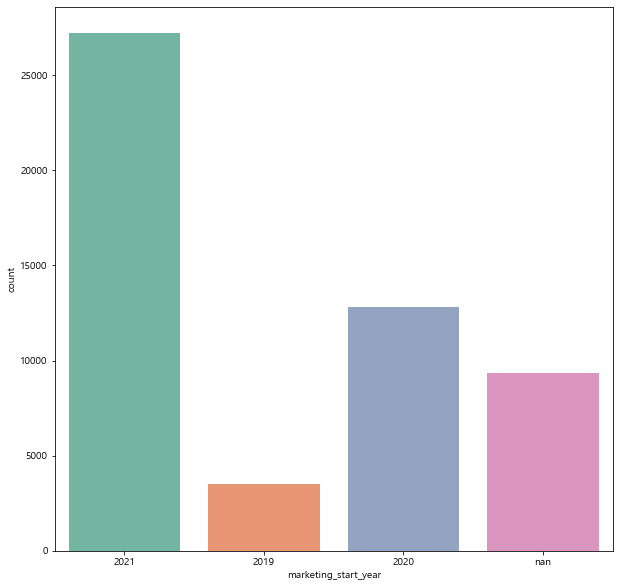

In [30]:
plt.figure(figsize=(10,10))
sns.countplot(data=df2, x='marketing_start_year', palette='Set2')
plt.show()

In [31]:
df2.pivot_table(index=['marketing_start_year'], values='transaction_amount', aggfunc=('mean','max','min'))

,max,mean,min
marketing_start_year,,,
2019,330000,74944.508383,0
2020,750000,108765.073471,0
2021,1800000,136199.700349,0
nan,113400000,350714.221033,0


In [32]:
df2[df2['marketing_start_year'] == '2019']['format'].value_counts()

올인원    2637
스쿨      875
이벤트       7
Name: format, dtype: int64

In [33]:
# 마케팅 시작 날짜가 없는 강의들

df2[df2['marketing_start_year'] == 'nan']['course_title'].value_counts()

초격차 패키지 : 한 번에 끝내는 node.js 웹 프로그래밍        828
나의 칼퇴치트키 엑셀유치원                            793
올인원 패키지 : 디지털 마케팅 MAX 2020                535
올인원 패키지 : 알고리즘 기술면접 완전 정복                 534
합격 패스 : 정보처리기사 필기&실기                      503
                                         ... 
(B2B) (주)너울정보 온라인 구독 올 플랜 - 비대면바우처          1
(B2B) 플라이크 온라인 구독 올 플랜 - 비대면바우처             1
(B2B) (주)원탑스튜디오 온라인 구독 올 플랜 - 비대면바우처        1
(B2B) 주식회사 퍼스텝컴퍼니 온라인 구독 올 플랜 - 비대면바우처      1
(B2B) (주)오디 온라인 구독 올 플랜 - 비대면바우처            1
Name: course_title, Length: 1304, dtype: int64

In [34]:
df2[df2['course_title'] =='초격차 패키지 : 한 번에 끝내는 node.js 웹 프로그래밍']['marketing_start_year'].value_counts()

nan    828
Name: marketing_start_year, dtype: int64

In [35]:
df2[df2['course_title'].str.contains("\(B2B\)",na=False)]['marketing_start_year'].value_counts()

# 유일하게 (B2B) 강의 중 마케팅 날짜가 있는 값
#df2[(df2['course_title'].str.contains("\(B2B\)",na=False)) & (df2['marketing_start_year'] == '2021')]

nan     1704
2021       1
Name: marketing_start_year, dtype: int64

# 구매한 월/요일/시간대별 분석

In [44]:
df.completed_at.dt.month.value_counts()

5    10067
8    10038
4     9659
6     9445
7     8919
9     6244
3     2366
Name: completed_at, dtype: int64

In [52]:
# '월' 기준
def month(x):
    if x==1:
        return '1'
    elif x==2:
        return '2'
    elif x==3:
        return '3'
    elif x==4:
        return '4'
    elif x==5:
        return '5'
    elif x==6:
        return '6'
    elif x==7:
        return '7'
    elif x==8:
        return '8'
    elif x==9:
        return '9'
    elif x==10:
        return '10'
    elif x==11:
        return '11'   
    else:
        return '12'
df2['completed_at_month'] = df2['completed_at'].dt.month.map(month)

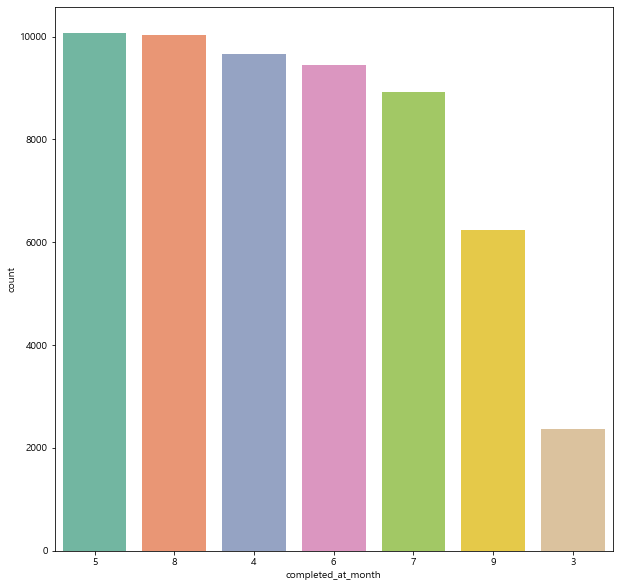

In [58]:
plt.figure(figsize=(10,10))
sns.countplot(data=df2, x='completed_at_month', order=df2['completed_at_month'].value_counts().index ,palette='Set2')
plt.show()

In [190]:
pivot_month = df2.pivot_table(index=['completed_at_month','type'], values='transaction_amount', aggfunc=('count'))

In [191]:
pivot_month

transaction_amount
completed_at_month type                       
3                  PAYMENT                2275
                   REFUND                   91
4                  PAYMENT                8980
                   REFUND                  679
5                  PAYMENT                9490
                   REFUND                  577
6                  PAYMENT                8919
                   REFUND                  526
7                  PAYMENT                8230
                   REFUND                  689
8                  PAYMENT                9270
                   REFUND                  768
9                  PAYMENT                5752
                   REFUND                  492

In [189]:
# refund 비율

df2.groupby(['completed_at_month','type'])['transaction_amount'].count()/df2.groupby(['completed_at_month'])['transaction_amount'].count()

completed_at_month  type   
3                   PAYMENT    0.961538
                    REFUND     0.038462
4                   PAYMENT    0.929703
                    REFUND     0.070297
5                   PAYMENT    0.942684
                    REFUND     0.057316
6                   PAYMENT    0.944309
                    REFUND     0.055691
7                   PAYMENT    0.922749
                    REFUND     0.077251
8                   PAYMENT    0.923491
                    REFUND     0.076509
9                   PAYMENT    0.921204
                    REFUND     0.078796
Name: transaction_amount, dtype: float64

In [222]:
df2['completed_at_month'].value_counts().index

Index(['5', '8', '4', '6', '7', '9', '3'], dtype='object')

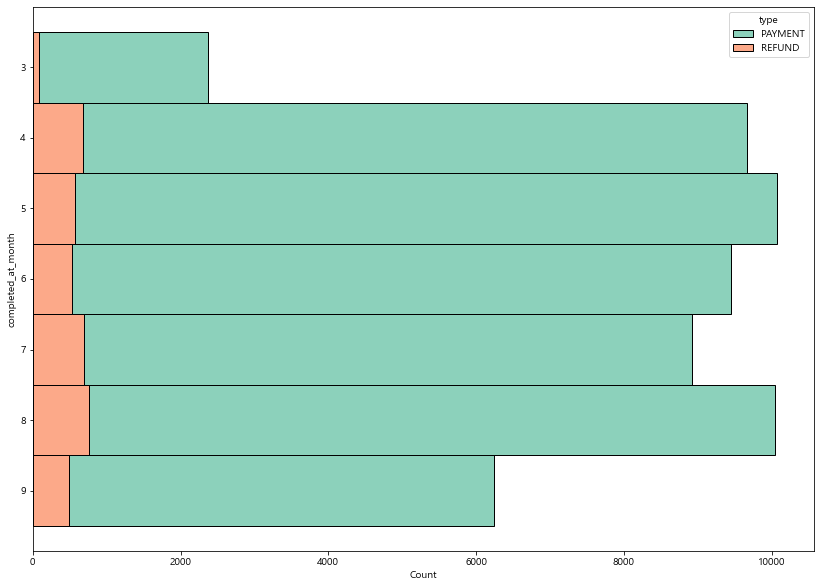

In [228]:
elem = df2['completed_at_month'].value_counts().index

plt.figure(figsize=(14,10))
sns.histplot(data=df2, y='completed_at_month', hue='type', multiple='stack', palette='Set2')
plt.show()

sns.barplot()

In [198]:
# 월별 쿠폰 사용량

def coupon(x):
    if x == True:
        return 1
    else:
        return 0
df2['is_coupon'] = df2['coupon_title'].notnull().map(coupon)

In [202]:
df2.pivot_table(index=['completed_at_month','is_coupon'], values='transaction_amount', aggfunc=('count'))

transaction_amount
completed_at_month is_coupon                    
3                  0                         766
                   1                        1600
4                  0                        4462
                   1                        5197
5                  0                        5645
                   1                        4422
6                  0                        7357
                   1                        2088
7                  0                        6336
                   1                        2583
8                  0                        5250
                   1                        4788
9                  0                        3159
                   1                        3085

In [203]:
# 월별 쿠폰사용비율

df2.groupby(['completed_at_month','is_coupon'])['transaction_amount'].count()/df2.groupby(['completed_at_month'])['transaction_amount'].count()

completed_at_month  is_coupon
3                   0            0.323753
                    1            0.676247
4                   0            0.461953
                    1            0.538047
5                   0            0.560743
                    1            0.439257
6                   0            0.778931
                    1            0.221069
7                   0            0.710394
                    1            0.289606
8                   0            0.523013
                    1            0.476987
9                   0            0.505926
                    1            0.494074
Name: transaction_amount, dtype: float64

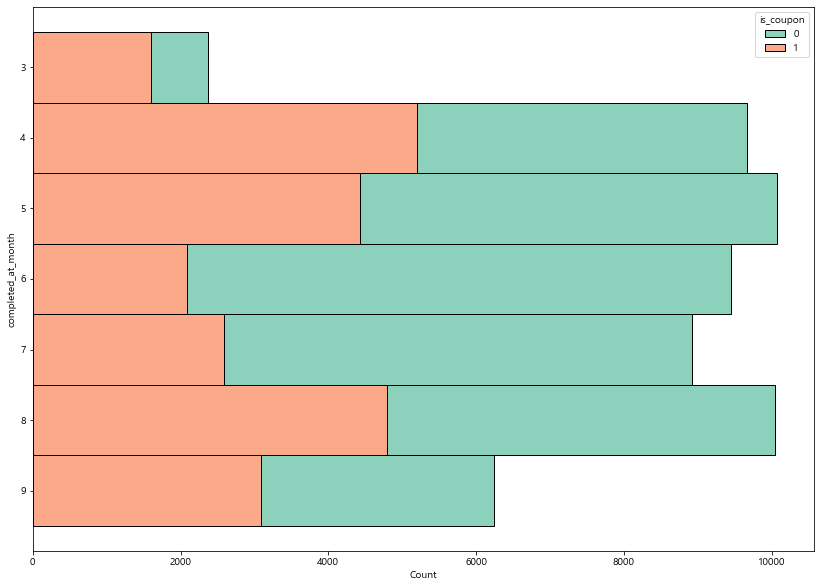

In [229]:
plt.figure(figsize=(14,10))
sns.histplot(data=df2, y='completed_at_month', hue='is_coupon', multiple='stack', palette='Set2')
plt.show()

In [239]:
# 요일별

def day(x):
    if x== 0:
        return '월요일'
    elif x==1:
        return '화요일'
    elif x==2:
        return '수요일'
    elif x==3:
        return '목요일'
    elif x==4:
        return '금요일'
    elif x==5:
        return '토요일'
    elif x==6:
        return '일요일'
df2['completed_at_day'] = df2['completed_at'].dt.day_of_week.map(day)

In [240]:
df2.head()

,id,customer_id,course_id,type,state,course_title,category_title,format,completed_at,transaction_amount,...,coupon_discount_amount,sale_price,pg,method,subcategory_title,marketing_start_at,marketing_start_year,completed_at_month,is_coupon,completed_at_day
2,970657,72297.0,204246.0,PAYMENT,COMPLETED,시크릿코드 : 프론트엔드 실무 완성편,프로그래밍,스쿨 온라인,2021-03-28 15:21:43,171810,...,19090.0,190900.0,NaN,CARD,NaN,2021-03-04,2021,3,1,일요일
4,970658,478028.0,201797.0,PAYMENT,COMPLETED,올인원 패키지 : 직장인 필수 스킬 3종 세트 MAX,업무생산성,올인원,2021-03-28 15:21:54,97500,...,20000.0,117500.0,NaN,CARD,PPT/보고서,2019-11-14,2019,3,1,일요일
8,970669,478033.0,203178.0,PAYMENT,COMPLETED,초격차 패키지 : 한번에 끝내는 영상 촬영과 편집,영상/3D,올인원,2021-03-28 15:26:47,96000,...,20000.0,116000.0,NaN,CARD,영상 편집,2020-12-02,2020,3,1,일요일
10,970671,469860.0,203644.0,PAYMENT,COMPLETED,올인원 패키지 : 권오상의 금융 아카데미 - 권오상의 재무제표 분석 기초(평생소장),부동산/금융,올인원,2021-03-28 15:27:17,263000,...,NaN,263000.0,NaN,CARD,NaN,2020-11-27,2020,3,0,일요일
14,970676,478035.0,203720.0,PAYMENT,COMPLETED,초격차 패키지 : 한 번에 끝내는 프론트엔드 개발,프로그래밍,올인원,2021-03-28 15:31:01,91000,...,20000.0,111000.0,NaN,CARD,프론트엔드 개발,2021-02-02,2021,3,1,일요일
